In [1]:
import sys
import os
from pathlib import Path

from fastai.vision.all import *
from fastbook import *
from torchvision import transforms
import torchvision
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

# Training MNIST Classifier From Scratch

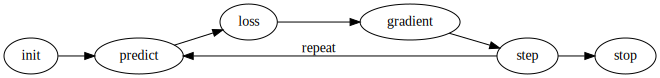

In [3]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [4]:
data_path = untar_data(URLs.MNIST)

In [5]:
data_path

Path('/home/kai/.fastai/data/mnist_png')

In [6]:
(data_path/ 'training').ls()

(#10) [Path('/home/kai/.fastai/data/mnist_png/training/5'),Path('/home/kai/.fastai/data/mnist_png/training/4'),Path('/home/kai/.fastai/data/mnist_png/training/2'),Path('/home/kai/.fastai/data/mnist_png/training/7'),Path('/home/kai/.fastai/data/mnist_png/training/3'),Path('/home/kai/.fastai/data/mnist_png/training/0'),Path('/home/kai/.fastai/data/mnist_png/training/8'),Path('/home/kai/.fastai/data/mnist_png/training/9'),Path('/home/kai/.fastai/data/mnist_png/training/1'),Path('/home/kai/.fastai/data/mnist_png/training/6')]

## Create the Dataset
Create a batch of all training and test datasets X -> (28*28, n_training_samples), and Y -> len 10 vector for all possible digits. Do same with test

In [117]:
xforms = torchvision.transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x))
])

In [20]:
dls = ImageDataLoaders.from_folder(path=data_path, train='training', valid='testing', 
                                   item_tfms=transforms.ToTensor(), bs=256, shuffle=True)

Could not do one pass in your dataloader, there is something wrong in it


In [153]:
train_x, train_y = list(map(list, zip(*list(train_folder))))
test_x, test_y = list(map(list, zip(*list(test_folder))))

train_x = torch.stack(train_x)
train_y = tensor(train_y)

test_x = torch.stack(test_x)
test_y = tensor(test_y)

In [148]:
train_dset = list(train_folder)
train_dl = DataLoader(train_dset, batch_size=256)

test_dset = list(test_folder)
test_dl = DataLoader(test_dset, batch_size=256)

dls = DataLoaders(train_dl, test_dl)

In [164]:
train_dset = list(zip(train_x, train_y))
train_dl = DataLoader(train_dset, batch_size=256, shuffle=True)
test_dset = list(zip(test_x, test_y))
test_dl = DataLoader(test_dset, batch_size=256, shuffle=True)

dls = DataLoaders(train_dl, test_dl)

In [160]:
x, y = train_dset[55000]
x.shape, y

(torch.Size([784]), tensor(9))

In [128]:
train_folder = torchvision.datasets.ImageFolder(root=data_path/'training', transform=xforms)
test_folder = torchvision.datasets.ImageFolder(root=data_path/'testing', transform=xforms)

train_data = DataLoader(train_folder, batch_size=256, shuffle=True)
test_data = DataLoader(test_folder, batch_size=256, shuffle=True)

dls = DataLoaders(train_data, test_data)

In [165]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 30),
    nn.ReLU(),
    nn.Linear(30,10)
)
print(simple_net)

# loss function
def mnist_loss(pred, actual):
    loss = nn.CrossEntropyLoss()
    return loss(pred, actual.squeeze())

def batch_accuracy(pred, actual):
    pred = pred.max(dim=1)[1]
    actual = actual.squeeze()
    correct = pred == actual
    return correct.float().mean()

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=10, bias=True)
)


In [166]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [171]:
epochs = 10
lr = 0.5
learn.fit(epochs, lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.071373,0.108925,0.965900,00:01
1,0.062989,0.101244,0.967900,00:01
2,0.052269,0.085435,0.973100,00:01
3,0.043141,0.081030,0.975600,00:01
4,0.039546,0.126715,0.962000,00:01
5,0.034402,0.104337,0.970700,00:01
6,0.028968,0.094271,0.972500,00:01
7,0.023014,0.104461,0.968900,00:01
8,0.019605,0.074259,0.976400,00:01
9,0.017928,0.090203,0.975500,00:01


6
3099


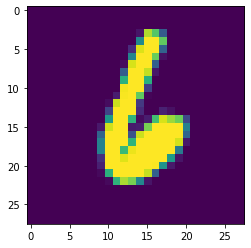

In [246]:
int_rand = np.random.randint(0, 10)
idx_rand = np.random.randint(5 * 10**3)
print(int_rand)
print(idx_rand)
image = Image.open((data_path/f"training/{int_rand}").ls()[idx_rand])
plt.imshow(image)

In [254]:
img_xform = xforms(image)
torch.topk(learn.model(img_xform), 1).indices[0]

tensor(6)

In [188]:
idx_rand

102

In [203]:
np.random.randint?

Docstring:
randint(low, high=None, size=None, dtype=int)

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the ``integers`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-like, must contain integer values
size : int or tuple of ints, optional
    Output shape.  If the given shape is, 